In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio, display

# Generating a soundwave

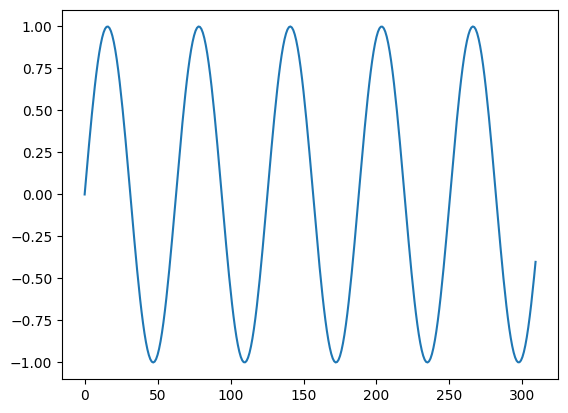

In [2]:
SAMPLING_RATE = 2 ** 14
MIDDLE_C_FREQ = 261.63


def make_sound(
    *,
    duration=1,
    sound_frequency=MIDDLE_C_FREQ,
    sampling_rate=SAMPLING_RATE,
):
    x = np.arange(duration * sampling_rate)
    y = np.sin(x * sound_frequency / sampling_rate * 2 * np.pi)
    return y
    

def show_signal(signal, plot=True):
    if plot:
        plt.plot(signal[:5 * int(SAMPLING_RATE / MIDDLE_C_FREQ)])
    display(Audio(data=signal, rate=SAMPLING_RATE))


show_signal(make_sound())

# Shifting pitch 

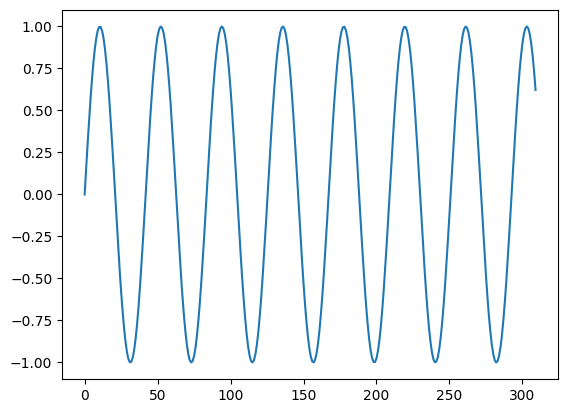

In [3]:
def shift_sound_frequency(*, halftones, sound_frequency=MIDDLE_C_FREQ):
    return sound_frequency * (2 ** (halftones / 12))


show_signal(make_sound(sound_frequency=shift_sound_frequency(halftones=7)))

# Overlaying signals

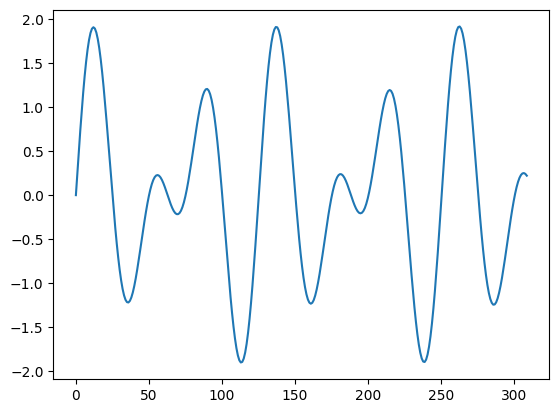

In [4]:
def overlay(*signals):
    return np.sum(signals, axis=0)


show_signal(overlay(
    make_sound(),
    make_sound(sound_frequency=shift_sound_frequency(halftones=7)),
))

# Distortion effect

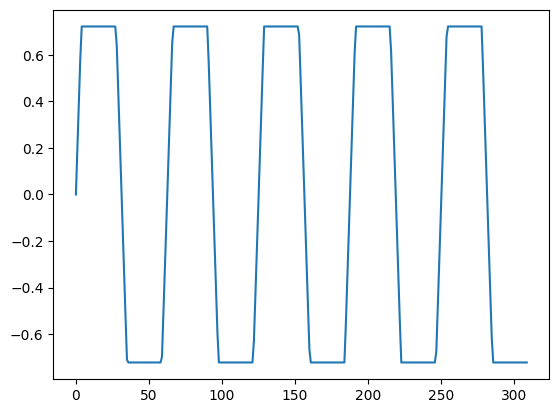

In [5]:
def add_effect_distortion(y, level=1):
    abs_mean = np.abs(y).mean()
    distortion_clip = np.exp(-level)
    y = y.clip(-distortion_clip, distortion_clip)
    y *= abs_mean / np.abs(y).mean()
    return y

show_signal(add_effect_distortion(make_sound()))

# Sound concatenation

In [6]:
show_signal(np.concatenate([
    make_sound(duration=.5, sound_frequency=shift_sound_frequency(halftones=0)),
    make_sound(duration=.5, sound_frequency=shift_sound_frequency(halftones=5)),
]), plot=False)

# Sound blending

In [7]:
def linear_blend(start_signal, end_signal):
    assert start_signal.shape == end_signal.shape
    end_weight = np.linspace(0, 1, len(end_signal))
    start_weight = 1 - end_weight
    return start_signal * start_weight + end_signal * end_weight


show_signal(linear_blend(
    make_sound(duration=3),
    make_sound(duration=3, sound_frequency=shift_sound_frequency(halftones=5)),
), plot=False)

# Combining effects

In [8]:
def add_effect_linear_distortion(y, level=1):
    return linear_blend(y, add_effect_distortion(y, level=level))


show_signal(add_effect_linear_distortion(overlay(make_sound(duration=3)), level=10), plot=False)

# Composing

In [9]:
show_signal(np.concatenate([
    make_sound(duration=.25, sound_frequency=shift_sound_frequency(halftones=0)),
    make_sound(duration=.25, sound_frequency=shift_sound_frequency(halftones=4)),
    make_sound(duration=.25, sound_frequency=shift_sound_frequency(halftones=7)),
    make_sound(duration=.25, sound_frequency=shift_sound_frequency(halftones=12)),
    add_effect_linear_distortion(overlay(
        make_sound(duration=2, sound_frequency=shift_sound_frequency(halftones=0)),
        make_sound(duration=2, sound_frequency=shift_sound_frequency(halftones=4)),
        make_sound(duration=2, sound_frequency=shift_sound_frequency(halftones=7)),
        make_sound(duration=2, sound_frequency=shift_sound_frequency(halftones=12)),
    )),
]), plot=False)